In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
asdata = pd.read_csv("/Users/pae2/OneDrive - cumc.columbia.edu/ValveNet/ValveNet/data/train_df_pace_removed_any_patient_negative_available.csv")

In [7]:
amyloidata = pd.read_csv("/Users/pae2/OneDrive - cumc.columbia.edu/CADnet/data/train_df_pace_removed_any_patient_negative_available.csv")

In [10]:
merge = asdata.merge(amyloidata, on='filename')

In [16]:
len(set(merge['filename']))

455

In [ ]:
# reshaped = reshaped[np.random.randint(5000)]
#To reconstruct the 12 lead ecg from the array
lead_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
# plt.rcParams["figure.figsize"] = [16,9]
# fig, axs = plt.subplots(len(lead_order))
def ecg_plot(array,labels):
    for i in range(0,10):
        plt.rcParams["figure.figsize"] = [16,9]
        fig, axs = plt.subplots(len(lead_order))
        a=np.random.randint(len(array))
        print("Label Value:",labels[a])
        if array.shape[1:3] == (2500, 12):
            for i in range(0,12):
                axs[i].plot(array[a][:,i])
                axs[i].set(ylabel=str(lead_order[i]))
        elif array.shape[1:3] == (12, 2500):
            for i in range(0,12):
                axs[i].plot(array[a][i,:])
                axs[i].set(ylabel=str(lead_order[i]))
        elif array.shape[1:] == (1,2500,12):
            for i in range(0,12):
                axs[i].plot(array[a][0][:,i])
                axs[i].set(ylabel=str(lead_order[i]))
        else:
            print("ECG shape not valid: ",array.shape)

In [5]:
labels = np.load("/Users/pae2/Google Drive/ECGnet/data/sim_ecg_labels.npy")
data = np.load("/Users/pae2/Google Drive/ECGnet/data/sim_ecg_data.npy")

In [6]:
data.shape

(5000, 12, 2500)

In [7]:
# reshaped = np.transpose(data,(data.shape[0],2500,12))

reshaped = np.transpose(data, axes=[0, 2, 1])

In [8]:
reshaped.shape

(5000, 2500, 12)

In [9]:
reshaped.sum()

15363989.279049752

In [10]:
negative = labels==0
positive = labels==1

In [11]:
modified = []
for i,ecg in enumerate(reshaped):
    if labels[i]==1:
        modified.append(ecg*10)
    else:
        modified.append(ecg)
modified = np.array(modified)

In [45]:
modified.shape

(5000, 2500, 12)

In [46]:
modified.sum()

76389600.07280184

Label Value: 0
Label Value: 1
Label Value: 0
Label Value: 1
Label Value: 1
Label Value: 1
Label Value: 1
Label Value: 0
Label Value: 0
Label Value: 1


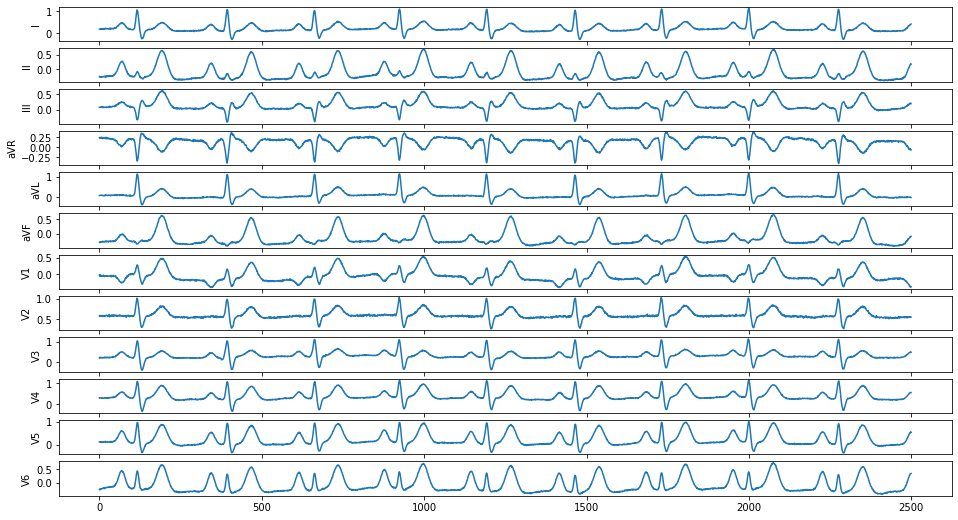

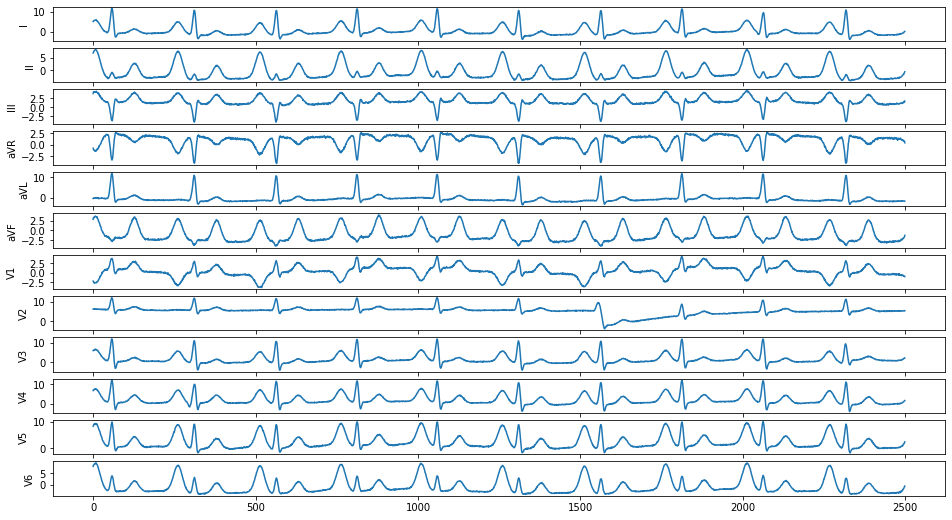

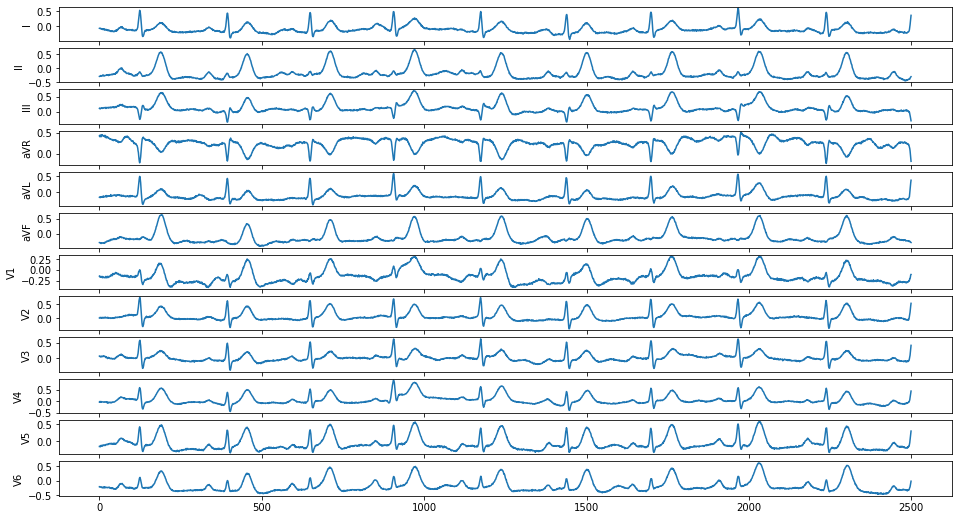

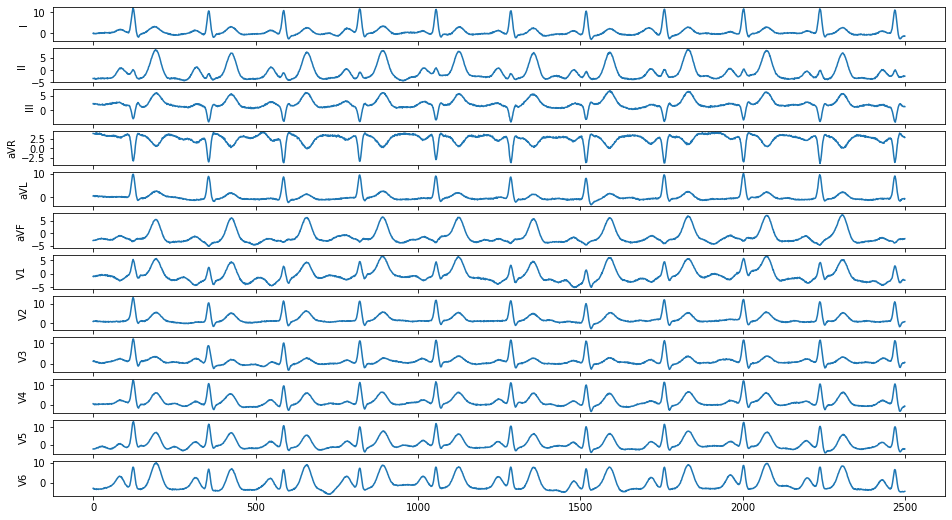

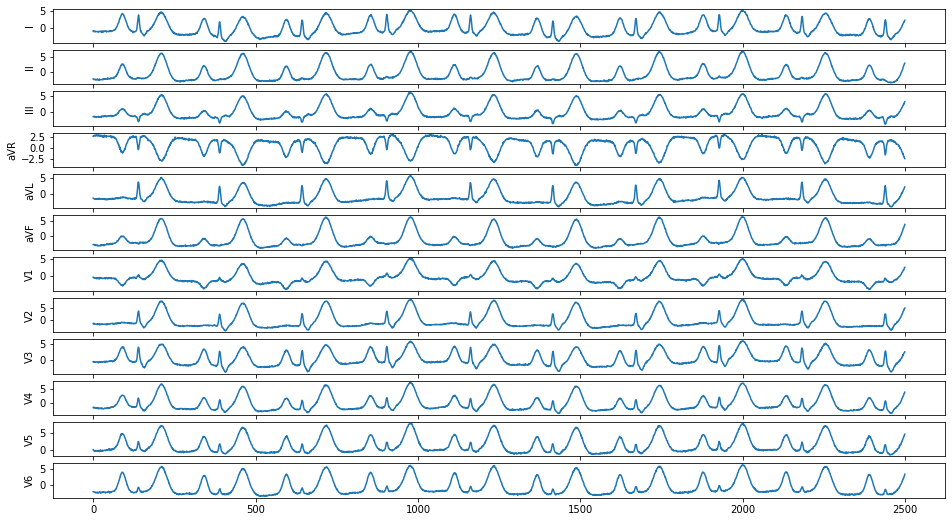

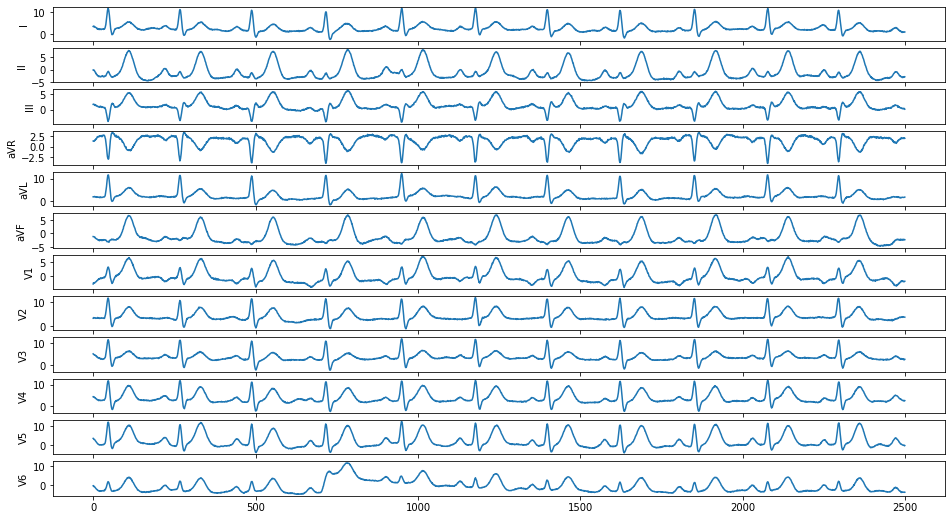

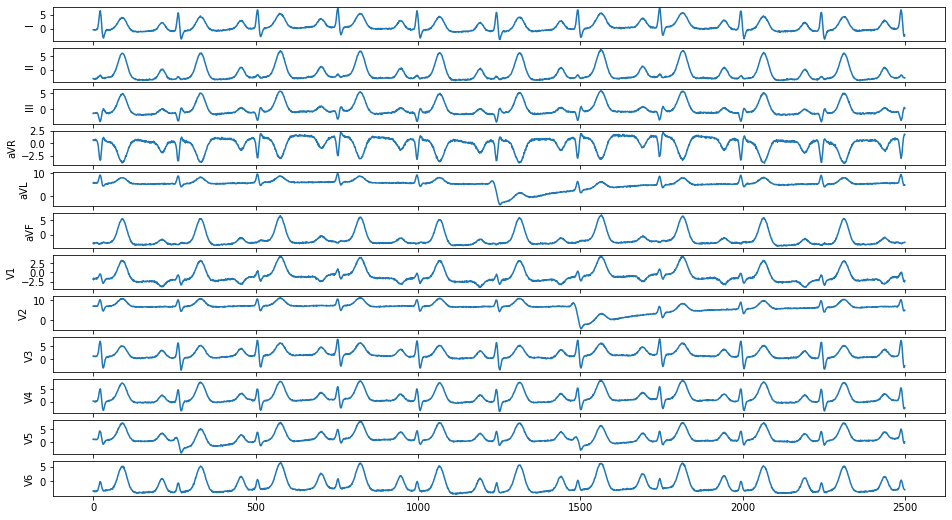

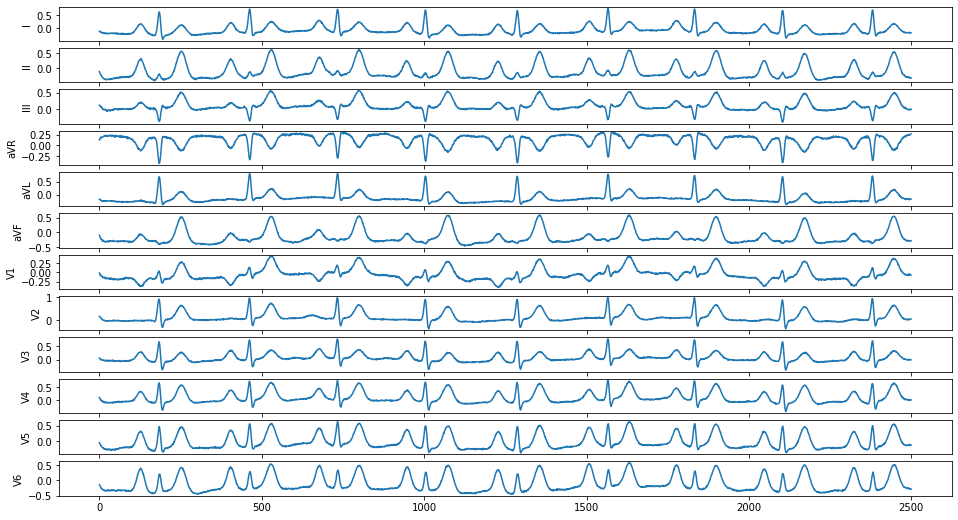

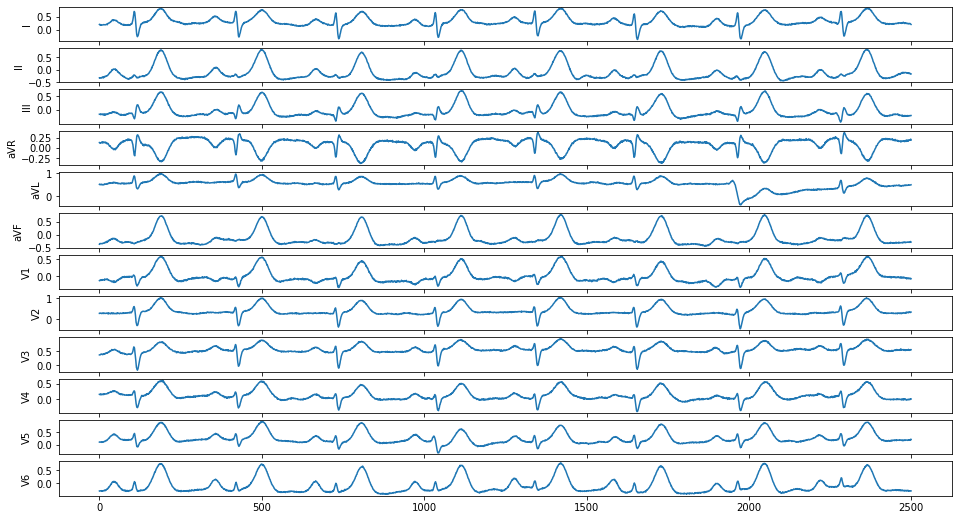

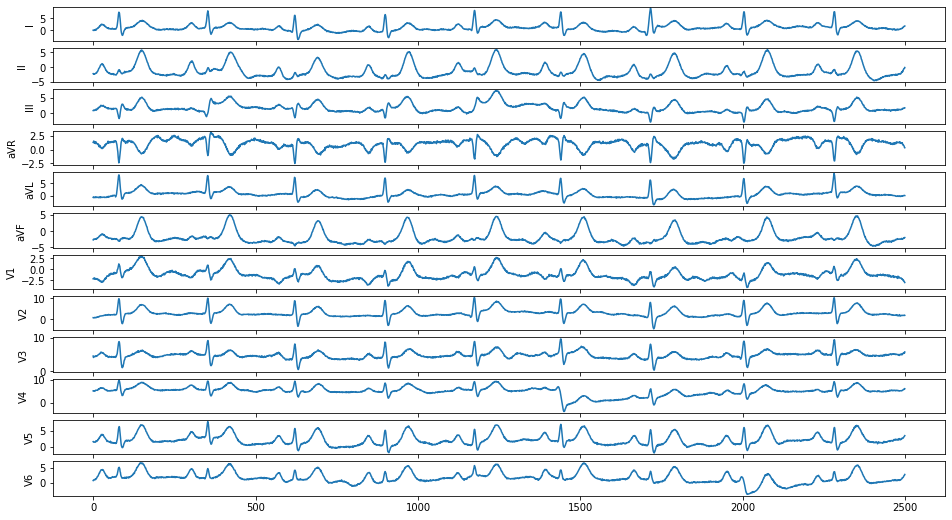

In [47]:
# reshaped = reshaped[np.random.randint(5000)]
#To reconstruct the 12 lead ecg from the array
lead_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
# plt.rcParams["figure.figsize"] = [16,9]
# fig, axs = plt.subplots(len(lead_order))
for i in range(0,10):
    plt.rcParams["figure.figsize"] = [16,9]
    fig, axs = plt.subplots(len(lead_order))
    a=np.random.randint(5000)
    print("Label Value:",labels[a])
    for i in range(0,12):
        axs[i].plot(modified[a][:,i])
        axs[i].set(ylabel=str(lead_order[i]))

In [48]:
trainData = modified
SHAPE=(2500,12,1)
dlen_train=trainData.shape[0]
trainData=trainData.reshape((dlen_train,)+SHAPE)

In [49]:
trainData.shape

(5000, 2500, 12, 1)

Label Value: 1
Label Value: 1
Label Value: 0
Label Value: 1
Label Value: 0
Label Value: 1
Label Value: 1
Label Value: 1
Label Value: 1
Label Value: 0


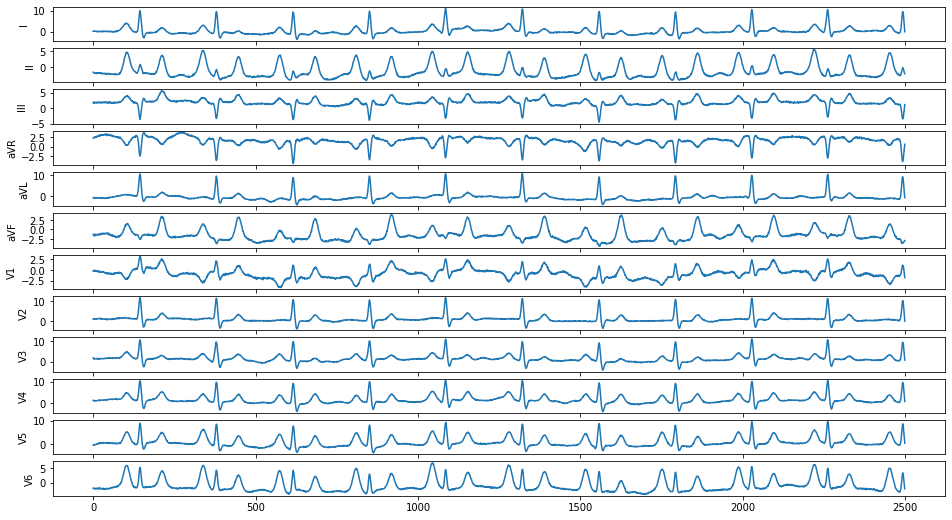

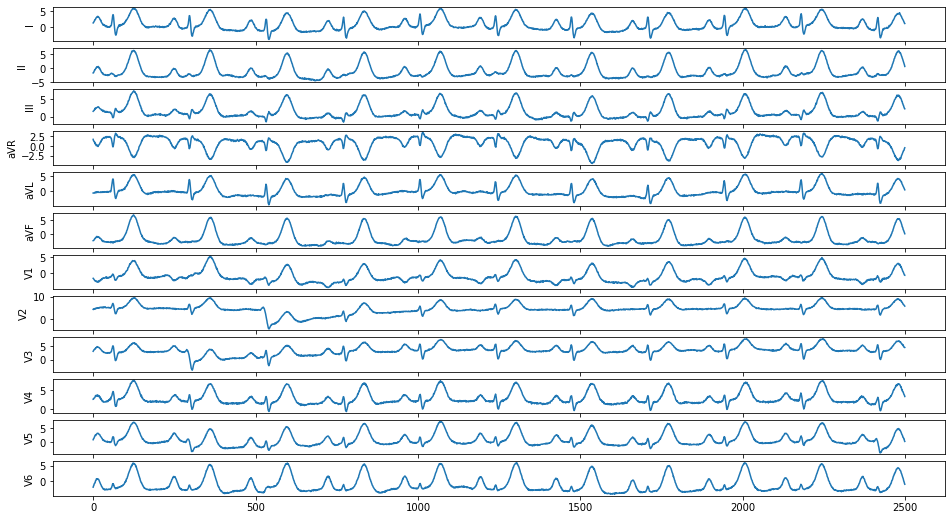

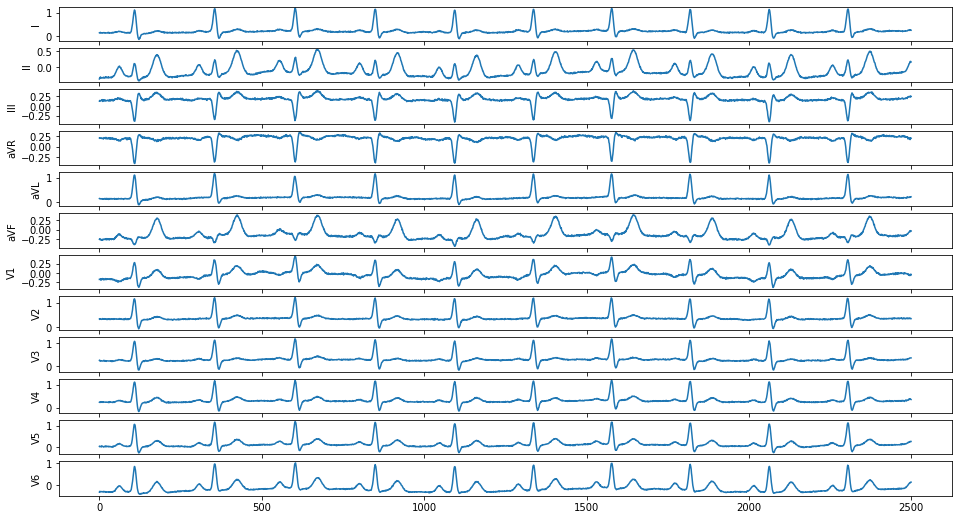

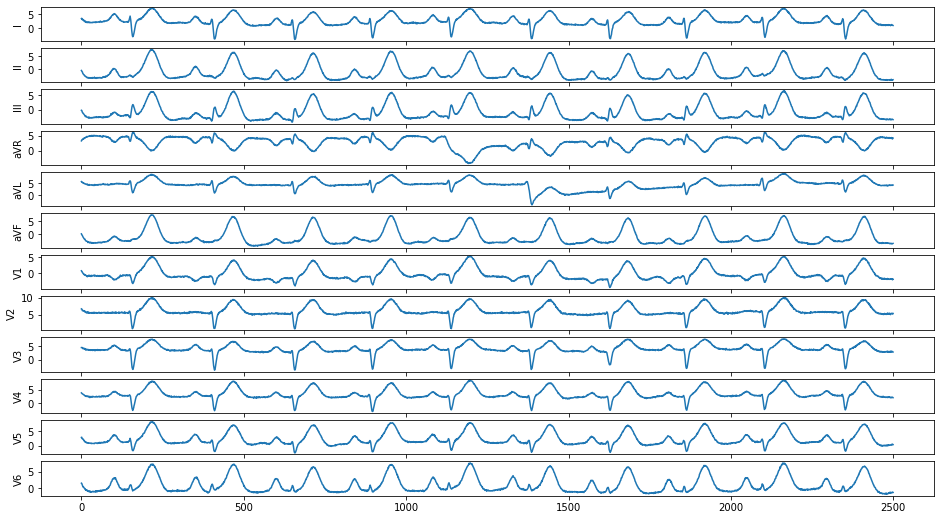

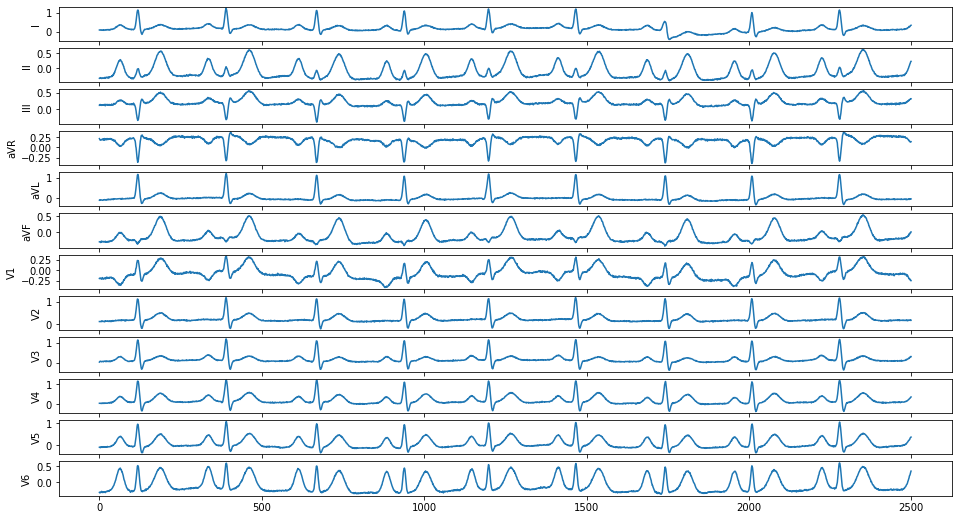

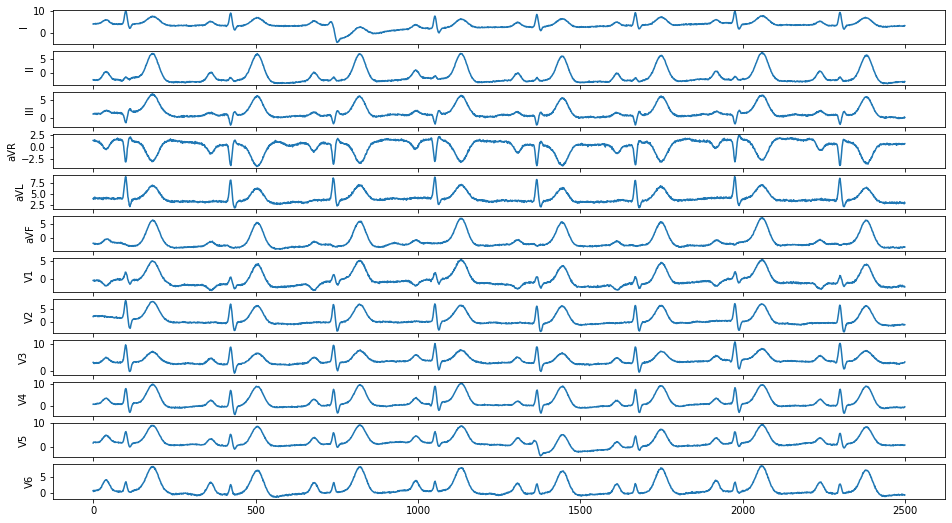

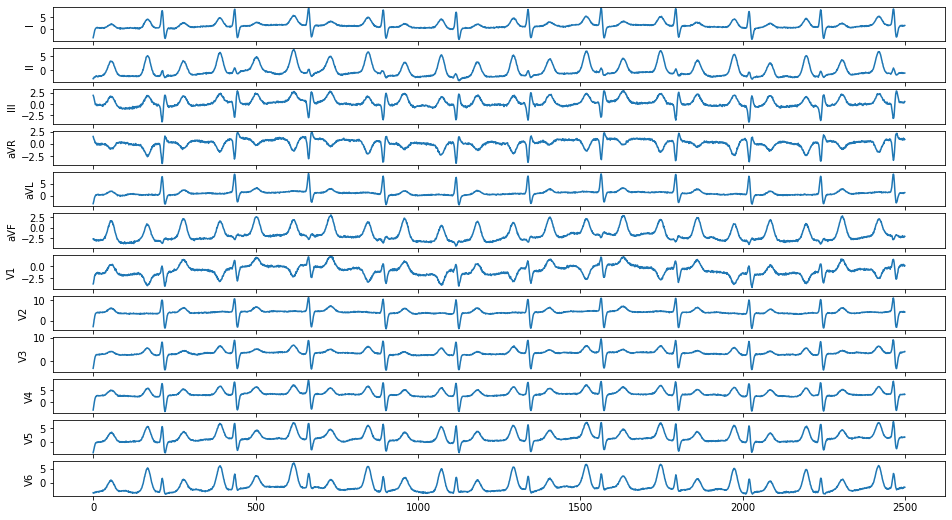

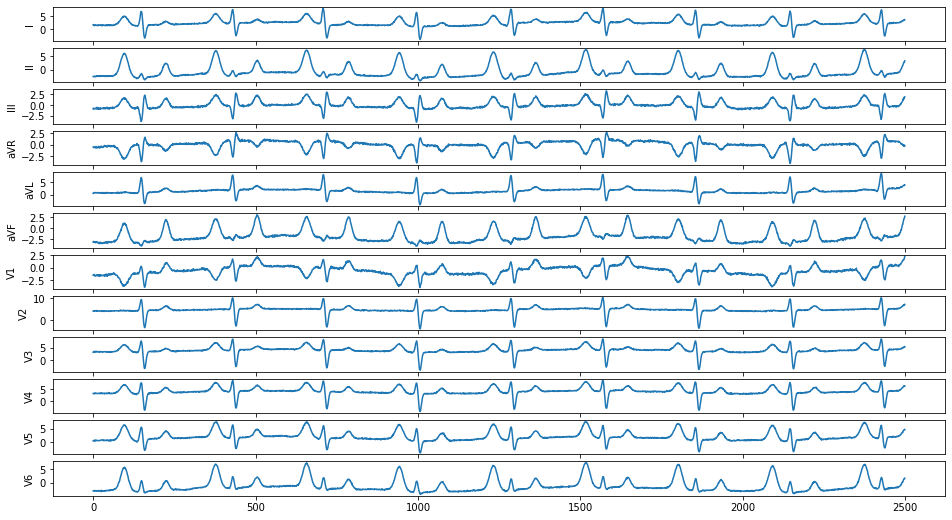

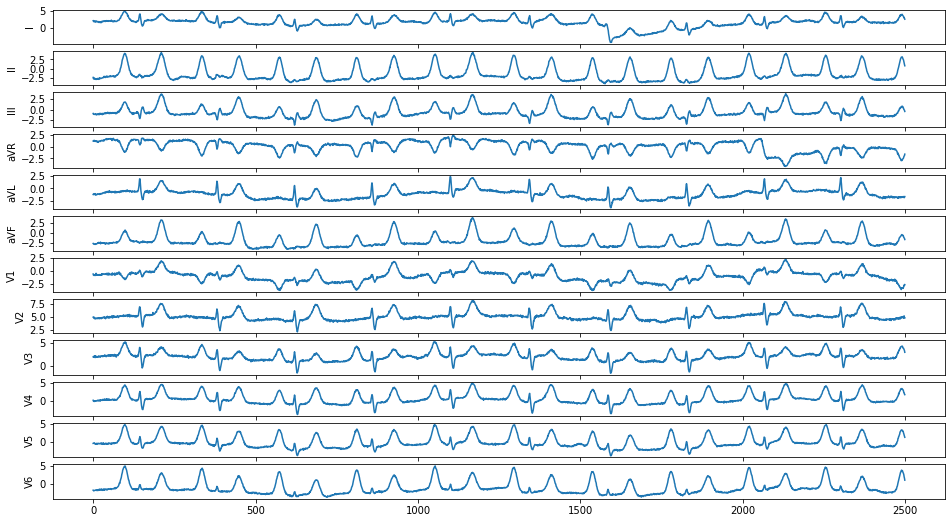

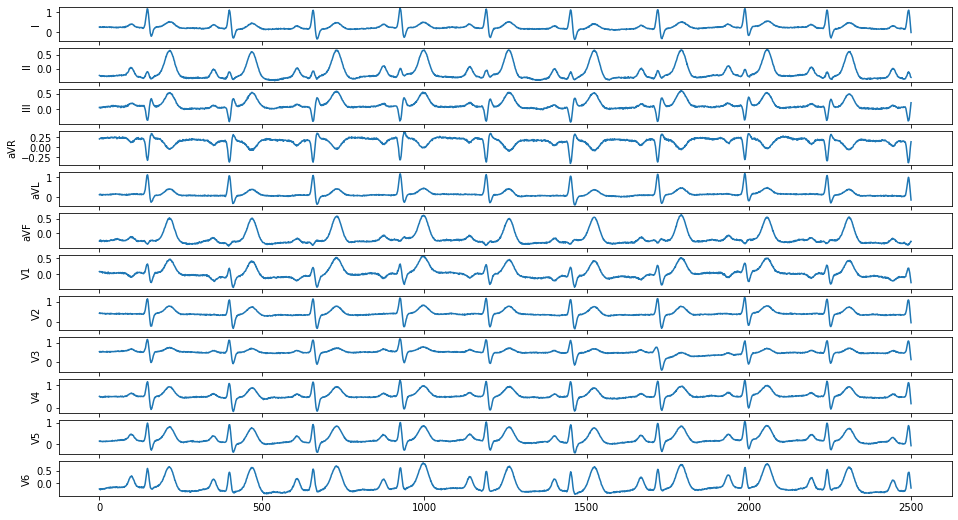

In [50]:
for i in range(0,10):
    plt.rcParams["figure.figsize"] = [16,9]
    fig, axs = plt.subplots(len(lead_order))
    a=np.random.randint(5000)
    print("Label Value:",labels[a])
    for i in range(0,12):
        axs[i].plot(trainData[a][:,i])
        axs[i].set(ylabel=str(lead_order[i]))

In [98]:
data = np.load('/Users/pae2/OneDrive - cumc.columbia.edu/ValveNet/ValveNet/data/keras_AS_concat_5k.npy')

In [99]:
df =  pd.read_csv('/Users/pae2/OneDrive - cumc.columbia.edu/ValveNet/ValveNet/data/eval_df_available_torch_5k_1DCNN_balanced.csv')

In [87]:
data.shape

(6026, 2500, 12, 1)

In [88]:
labels  = np.array([round(x) for x in df['stenosis_label_binary']])

In [89]:
modified = []
for i,ecg in enumerate(data):
    if labels[i]==1:
        modified.append(ecg*10)
    else:
        modified.append(ecg)
modified = np.array(modified)

Label Value: 0
Label Value: 0
Label Value: 1
Label Value: 0
Label Value: 0
Label Value: 0
Label Value: 0
Label Value: 1
Label Value: 1
Label Value: 0


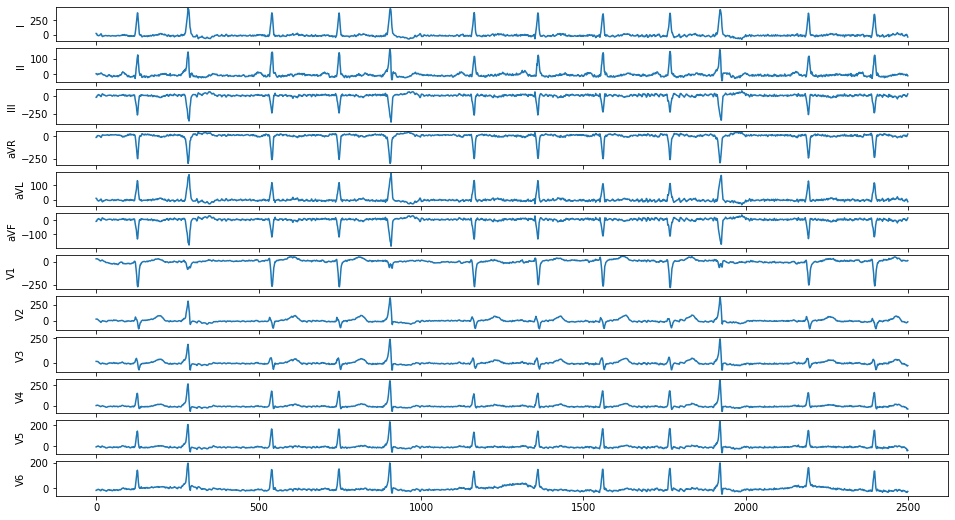

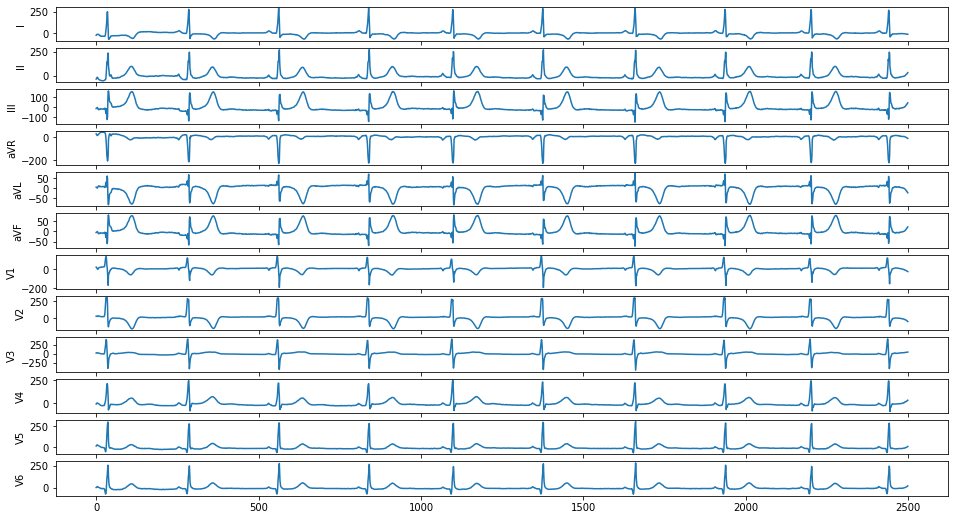

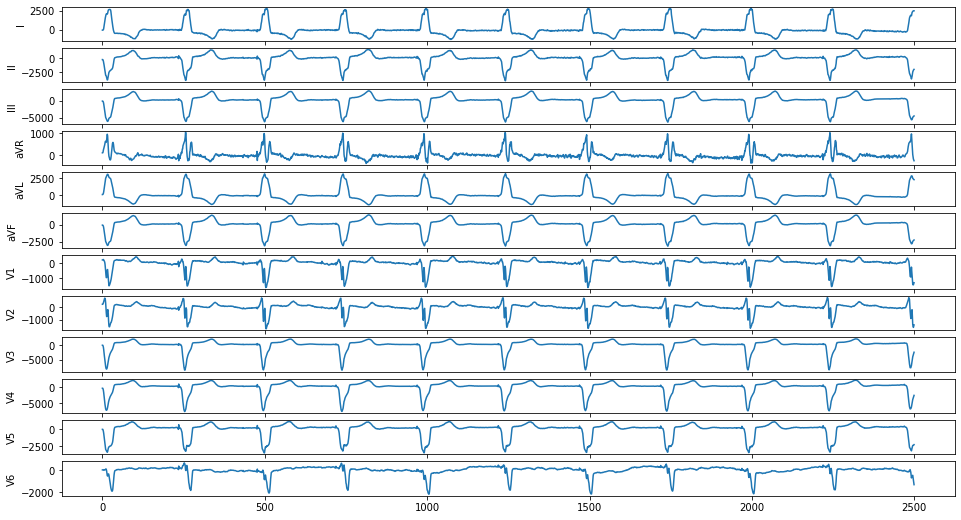

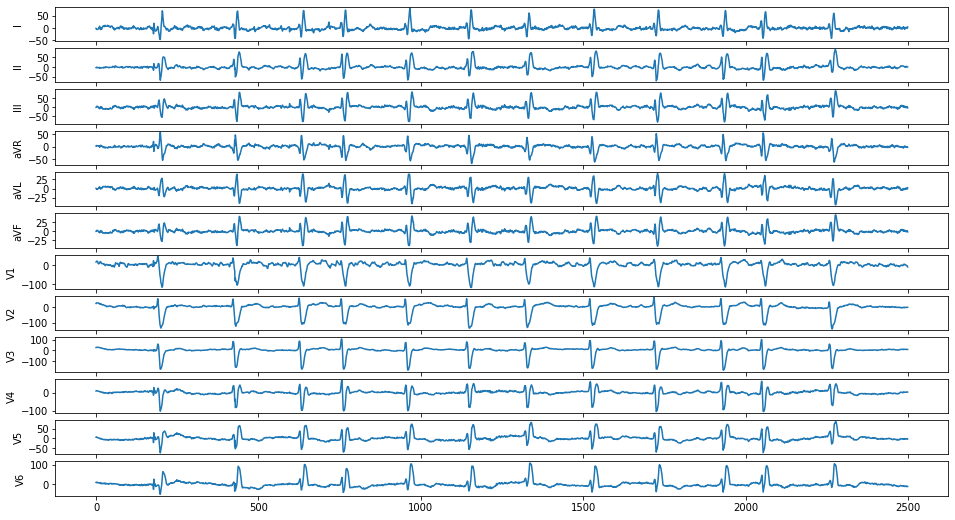

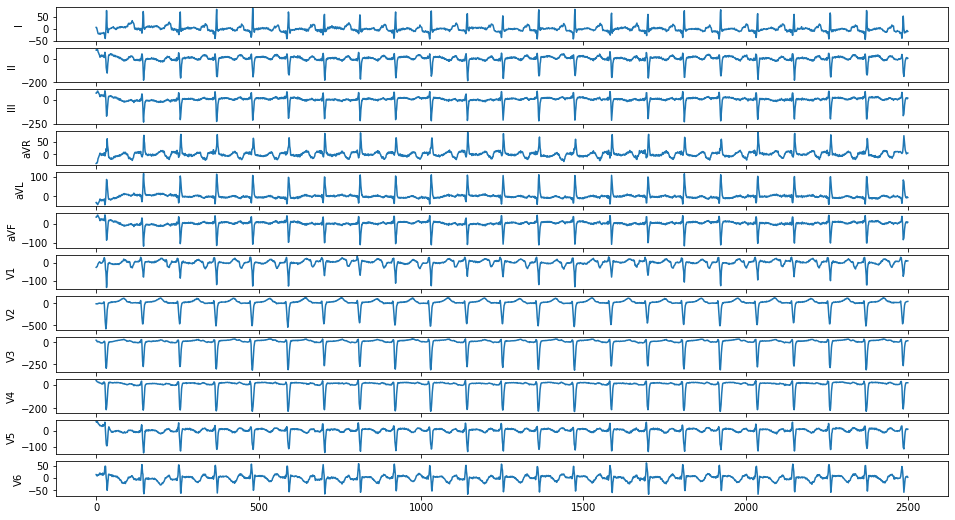

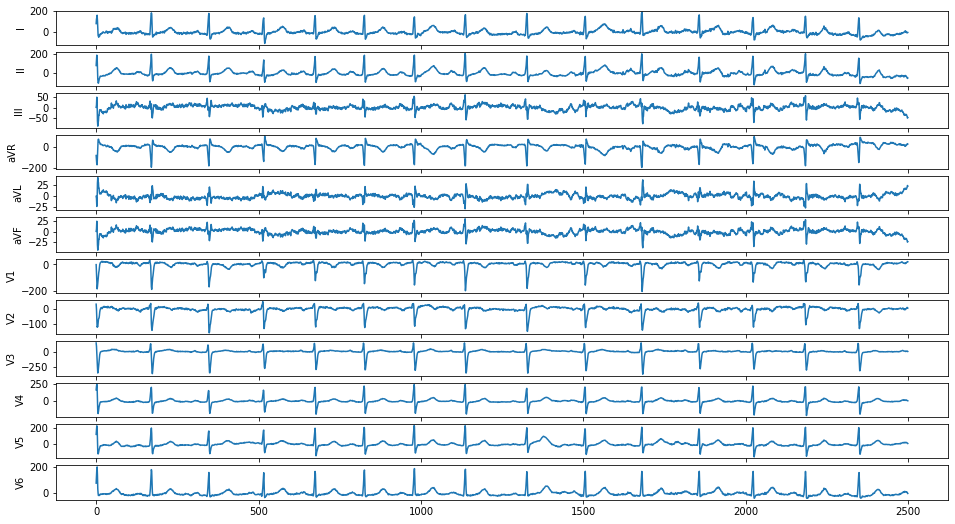

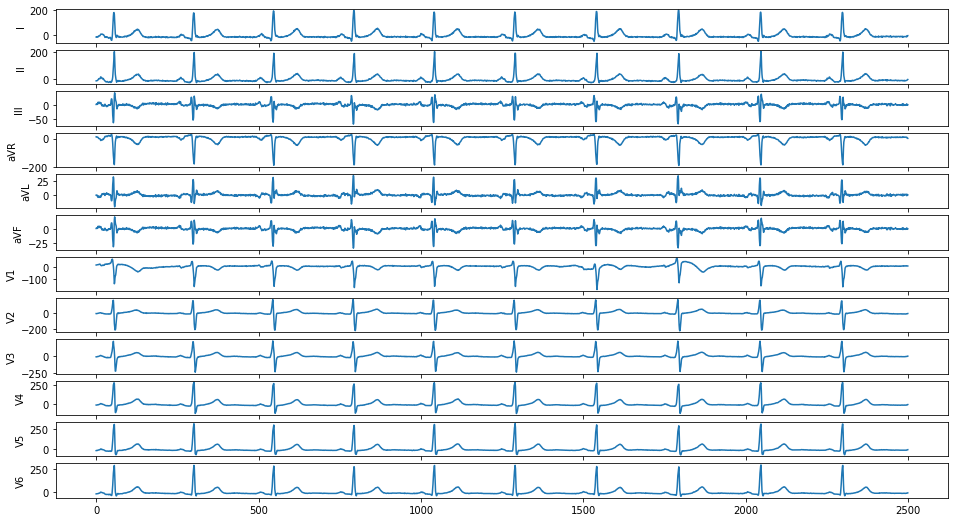

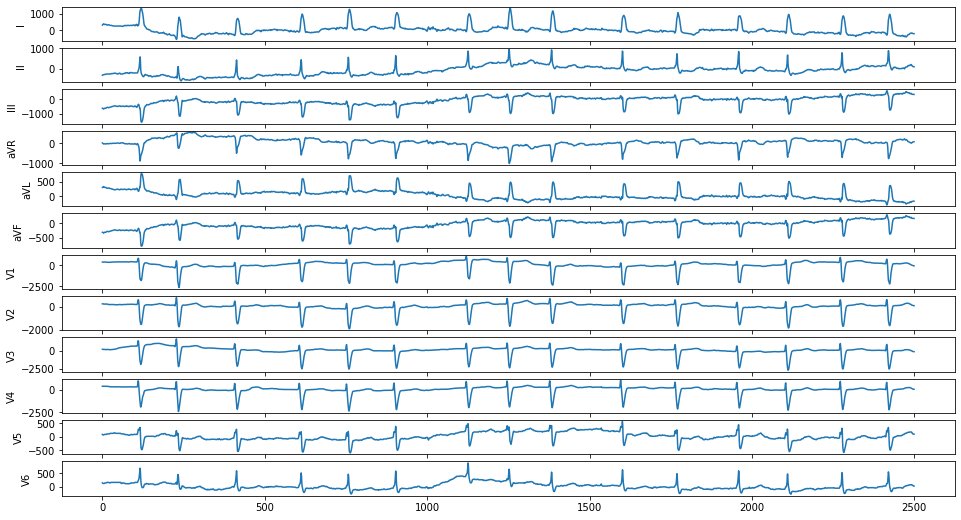

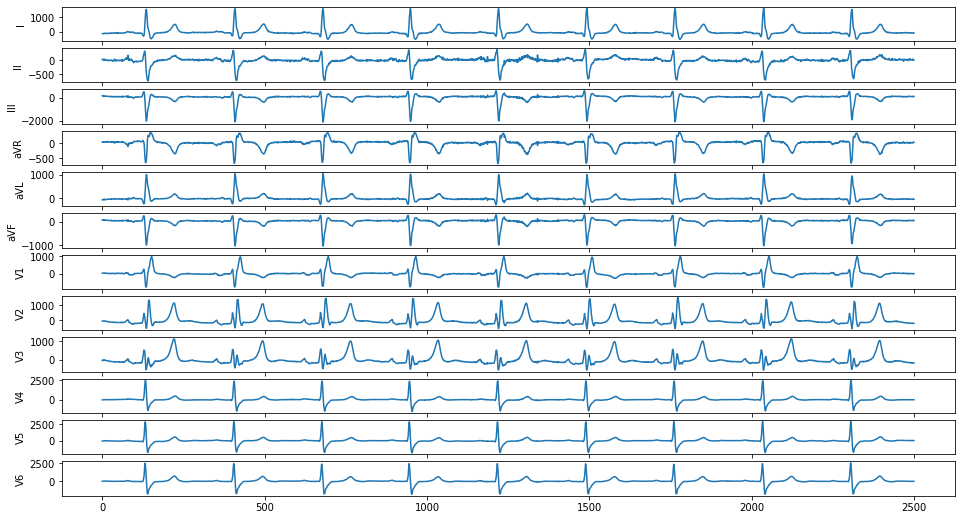

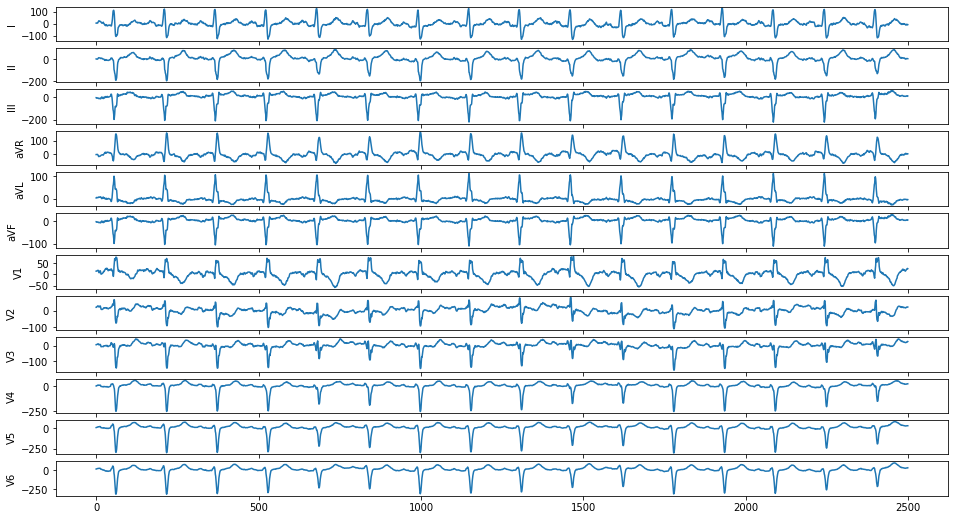

In [56]:
for i in range(0,10):
    plt.rcParams["figure.figsize"] = [16,9]
    fig, axs = plt.subplots(len(lead_order))
    a=np.random.randint(5000)
    print("Label Value:",labels[a])
    for i in range(0,12):
        axs[i].plot(modified[a][:,i])
        axs[i].set(ylabel=str(lead_order[i]))

In [90]:
import cv2        
datanorm = cv2.normalize(data, data, -1, 1, cv2.NORM_MINMAX)


In [102]:
mean = np.mean(data)
sd = np.std(data)
datasdlimit = data
datasdlimit = np.where(datasdlimit > mean + (3*sd), mean + (3*sd), datasdlimit) 
datasdlimit = np.where(datasdlimit < mean - (3*sd), mean - (3*sd), datasdlimit) 
datanorm2 = cv2.normalize(datasdlimit, datasdlimit, -1, 1, cv2.NORM_MINMAX)
# final_list = [x for x in data if (x > mean - 2 * sd)]
# def norm_3SD_max(array, mean, sd):
#     for x in array:
#         if x > mean + (3*sd):
            
# final_list = [x for x in final_list if (x < mean + 2 * sd)]
# print(final_list)

In [ ]:
datasdlimit

In [23]:
datanorm.mean()

-0.034238742866031756

In [19]:
from scipy import stats

In [24]:
dnflat = datanorm.flatten()

In [100]:
stats.describe(data.flatten())

DescribeResult(nobs=180780000, minmax=(-16567.0, 17741.0), mean=-0.3313951239075119, variance=2908.192390160116, skewness=-6.346699227016944, kurtosis=6420.242104951852)

In [103]:
stats.describe(datasdlimit.flatten())

DescribeResult(nobs=180780000, minmax=(-162.11437125755023, 161.45158100973524), mean=0.2450489789989975, variance=1269.5014211665698, skewness=-0.14880382915049153, kurtosis=9.150097863336402)

In [105]:
datanorm2 = cv2.normalize(datasdlimit, datasdlimit, -1, 1, cv2.NORM_MINMAX)

In [106]:
stats.describe(datanorm2.flatten())

DescribeResult(nobs=180780000, minmax=(-1.0, 0.9999999999999999), mean=0.0035630702109863024, variance=0.04850288265675837, skewness=-0.14880382915049292, kurtosis=9.15009786333649)

Label Value: 1
Label Value: 0
Label Value: 0
Label Value: 1
Label Value: 0
Label Value: 0
Label Value: 0
Label Value: 1
Label Value: 0
Label Value: 0


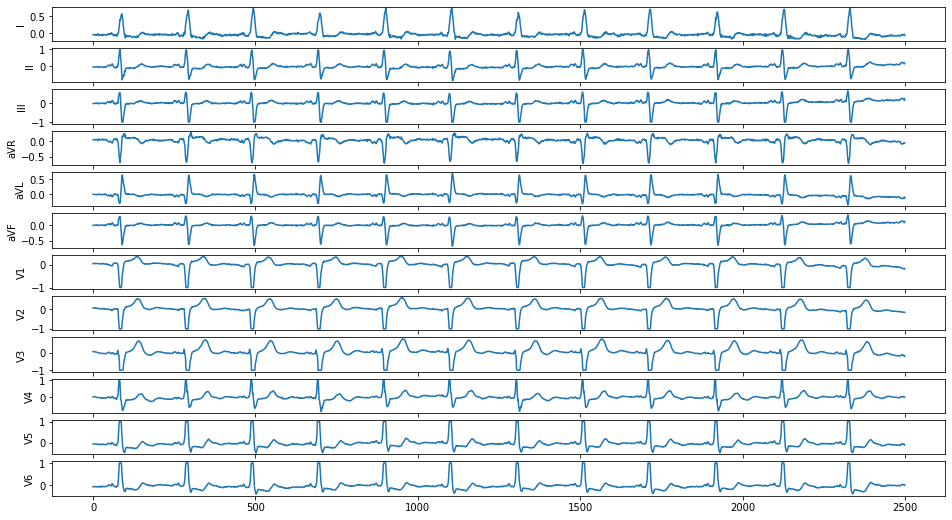

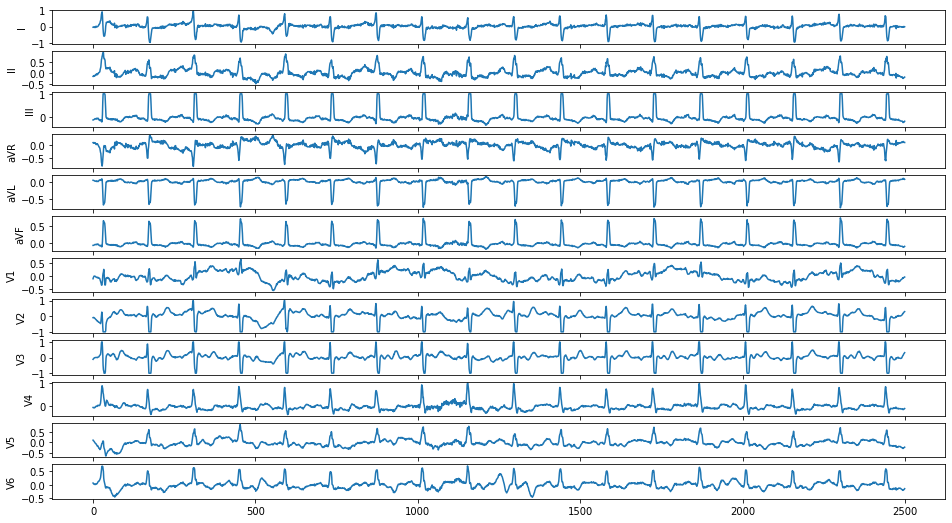

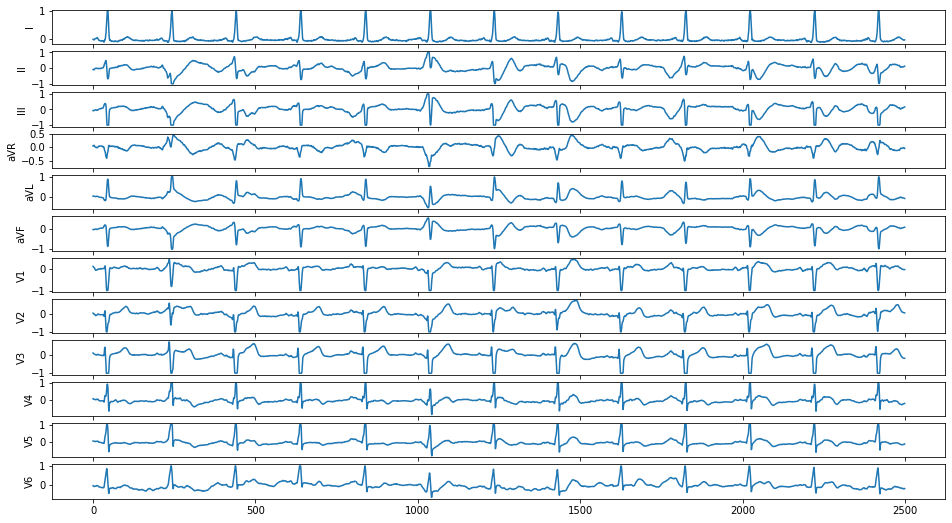

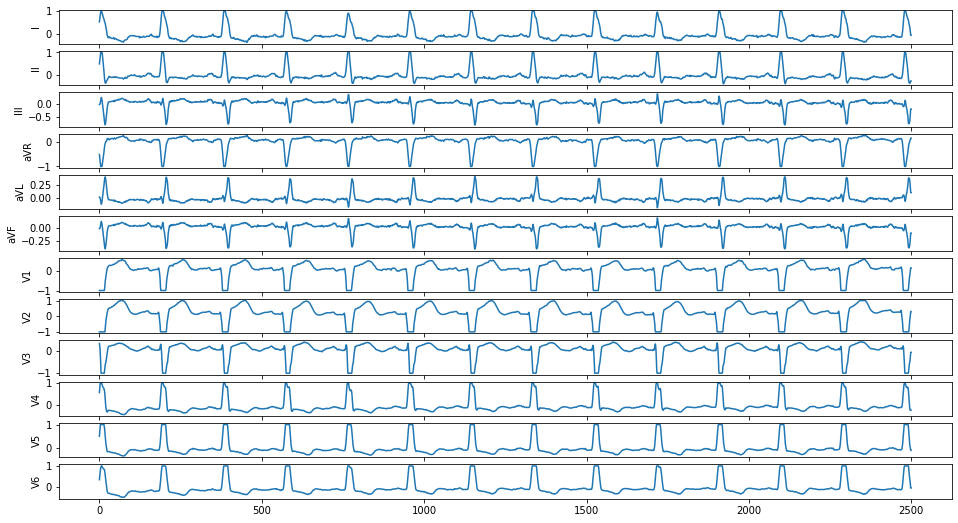

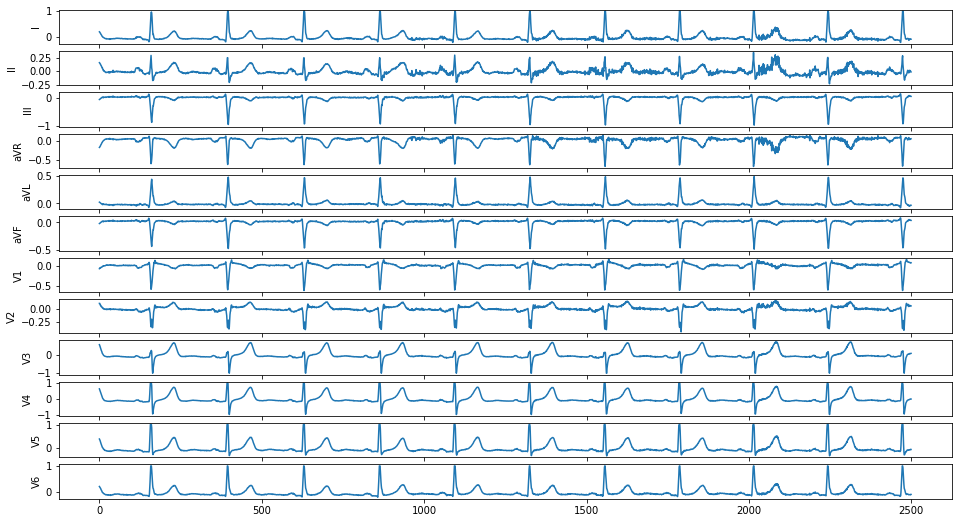

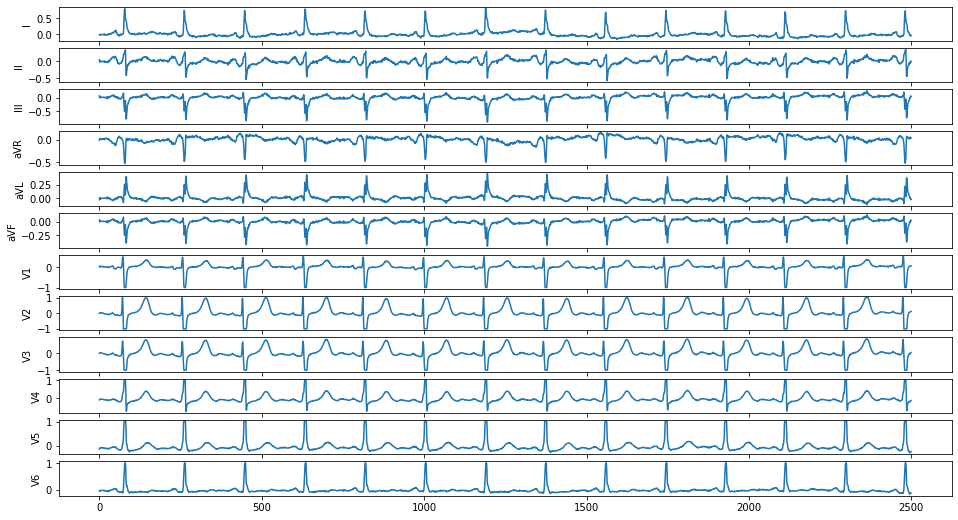

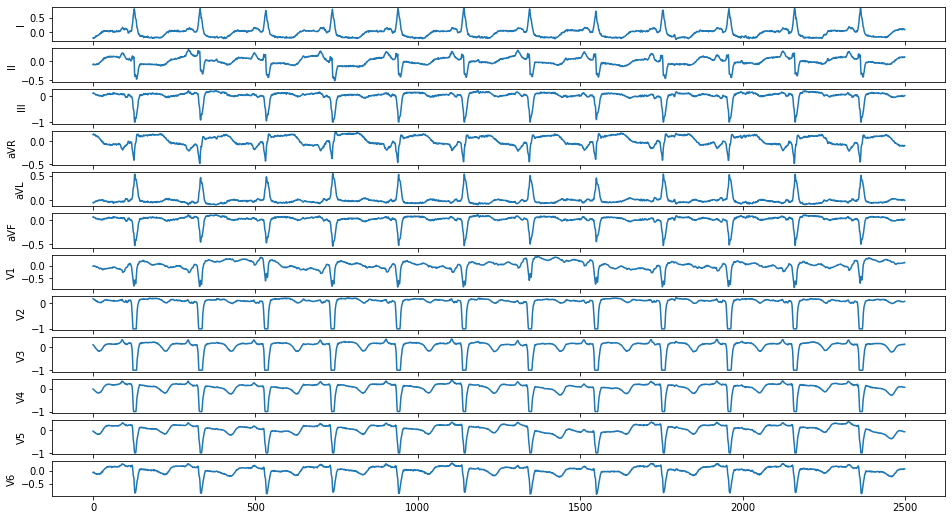

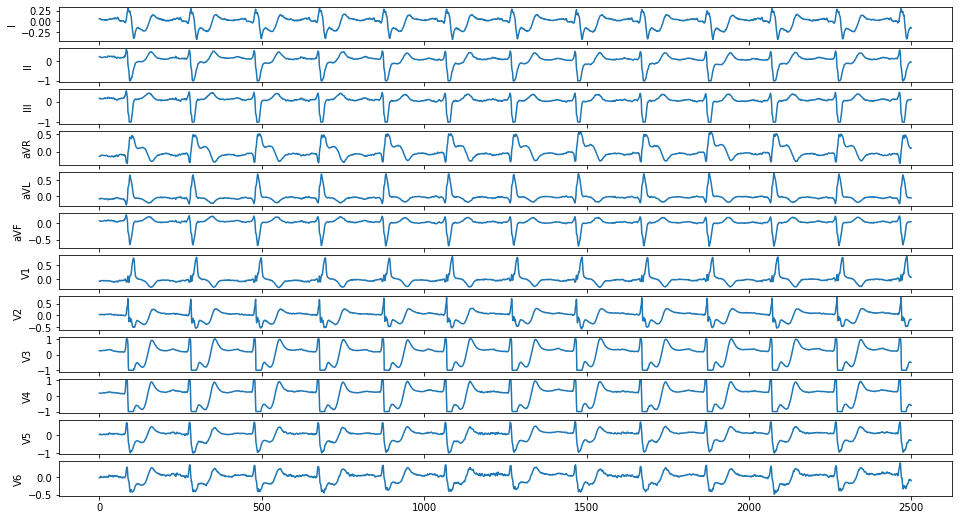

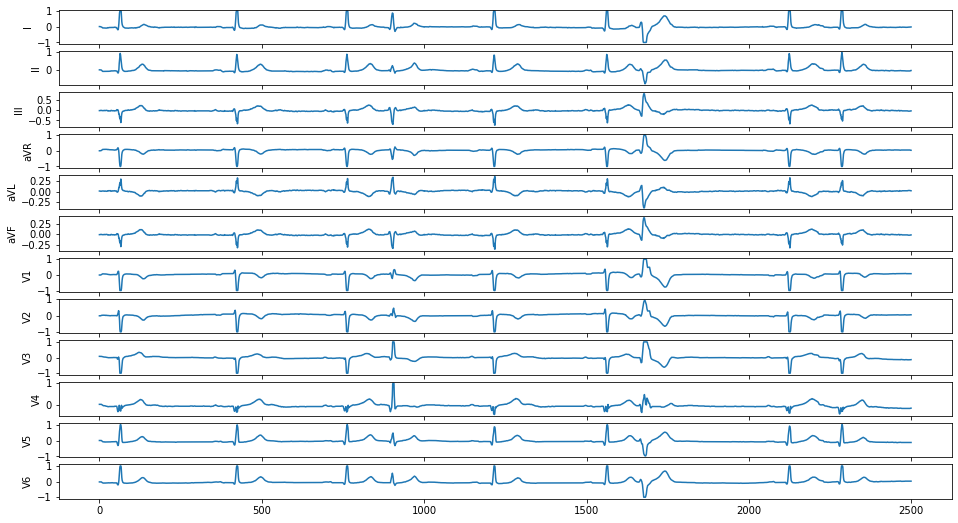

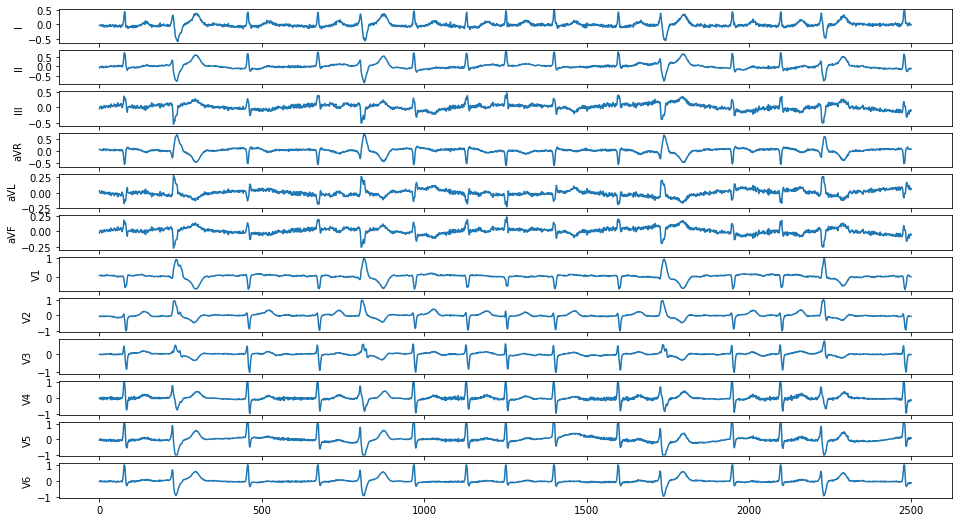

In [108]:
lead_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
for i in range(0,10):
    plt.rcParams["figure.figsize"] = [16,9]
    fig, axs = plt.subplots(len(lead_order))
    a=np.random.randint(5000)
    print("Label Value:",labels[a])
    for i in range(0,12):
        axs[i].plot(datanorm2[a][:,i])
        axs[i].set(ylabel=str(lead_order[i]))

In [29]:
np.histogram(dnflat, bins=20)

(array([       17,        14,        23,        83,       196,       337,
              300,       380,      2284, 180760716,     13994,       683,
              355,       428,       113,        24,        22,        14,
                0,        17]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

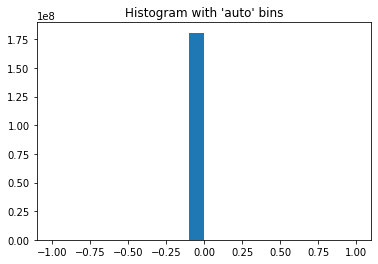

In [26]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack(dnflat)
_ = plt.hist(a, bins=20)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack(data.flatten())
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [27]:
import torch
import torchaudio
import matplotlib.pyplot as plt

In [ ]:
import torchvision

data_norm = torchvision.transforms.Normalize(mean, std, inplace=False)

In [59]:
a = labels[:3000]
b = labels[3000:]

In [65]:
a.sum()

0

In [66]:
b.sum()

3013

In [61]:
c = list(a)+list(b)

In [63]:
len(c)

6026

In [64]:
c=np.array(c)

In [69]:
d = c[:3000]
e = c[3000:]

In [68]:
d.sum()

0

In [70]:
e.sum()

3013

In [6]:
data2 = np.expand_dims(data, axis=0)


In [7]:
data2.shape

(1, 5000, 12, 2500)

In [28]:
data2_transposed = np.transpose(data2, axes=[1,3,2,0])

In [29]:
data2_transposed.shape

(2500, 1, 12, 5000)

In [30]:
a = data2_transposed.squeeze()

In [31]:
a = np.array(a)

In [32]:
a.shape

(2500, 12, 5000)